# <font color='SaddleBrown'>**Part 1 : Data Extraction**</font> 🔍




##<font color='Chocolate'> **1- Install & import all libraries** 📚

In [ ]:
!pip3 install spacy
!pip install rdflib
!pip install PyPDF2
!pip install owlready2
!pip install wordcloud
!pip install pdfplumber
!python -m spacy download en_core_web_lg 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-10-18 20:22:11.719154: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.3 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en

In [ ]:
import re
import os
import io
import nltk
import spacy
import string
import gensim
import rdflib
import PyPDF2
import pdfplumber
import numpy as np
import pandas as pd
import en_core_web_sm
import seaborn as sns
from owlready2 import *
from spacy import displacy
from rdflib	import Namespace
from spacy.tokens import Span
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy.matcher import Matcher
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##<font color='Chocolate'> **2- Read the document** 📁


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# List the drive's content to fix the path
! ls /content/gdrive/MyDrive/projetIA

extract  pdf.pdf  PMBOK6-2017.pdf  PMBOK6-201.pdf  pmbok.pdf


In [ ]:
# Open the file
open_filename =open("/content/gdrive/MyDrive/projetIA/pmbok.pdf","rb")
ind_manifesto = PyPDF2.PdfFileReader(open_filename)
pdf = pdfplumber.open(open_filename)

In [ ]:
# Check file's information
ind_manifesto.getDocumentInfo()

{'/CreationDate': "D:20170828082604-04'00'",
 '/Creator': 'Adobe InDesign CS6 (Macintosh)',
 '/ModDate': "D:20170907131536+03'00'",
 '/PDFVersion': '1.6',
 '/Producer': '3-Heights(TM) PDF Security Shell 4.8.25.2 (http://www.pdf-tools.com)',
 '/Trapped': '/False'}

In [ ]:
# Check number of pages 
total_pages = ind_manifesto.numPages
total_pages

976

##<font color='Chocolate'> **3- Extract Chapters** 📖

In [ ]:
def ChapterExtraction():
  
    c=''
    name=''
    dfChapter = pd.DataFrame(columns=['Chapter', 'Chapter Desc']) 

    for i in range (166,170) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCOPE MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    c=''
    for i in range (210,215) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCHEDULE MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    c=''
    for i in range (268,271) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT COST MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    return (dfChapter)

In [ ]:
dfChapter = ChapterExtraction()
dfChapter

,Chapter,Chapter Desc
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...


##<font color='Red'>**Attention : Irrelevant objects** ⚠️

In [ ]:
# Remove page number
def remove_page_number(text):
    return re.sub("\d\d\d","",text)

def espace(text):
    return re.sub("Figure"," Figure",text)

##<font color='Chocolate'> **4- Extract Proccess** 📄

In [ ]:
# Extract the lists of inputs, tools and outputs in order to use them for the delimitation of the process
ch = ''
for i in range (170,307) : 
		ch = ch + pdf.pages[i].extract_text()
	
ch= remove_page_number(ch)
ch = espace(ch)
inputs = re.compile(r'\d+\..+: INPUTS\n')
tools_and_techniques = re.compile(r'\d+\..+: TOOLS AND TECHNIQUES\n')
outputs = re.compile(r'\d+\..+: OUTPUTS\n')

inputsList = inputs.findall(ch)
toolsList = tools_and_techniques.findall(ch)
outputsList = outputs.findall(ch)

In [ ]:
print(len(inputsList))
print(len(toolsList))
print(len(outputsList))

16
16
16


In [ ]:
print(inputsList)
print(toolsList)
print(outputsList)

['5.1.1 PLAN SCOPE MANAGEMENT: INPUTS\n', '5.2.1 COLLECT REQUIREMENTS: INPUTS\n', '5.3.1 DEFINE SCOPE: INPUTS\n', '5.4.1 CREATE WBS: INPUTS\n', '5.5.1 VALIDATE SCOPE: INPUTS\n', '5.6.1 CONTROL SCOPE: INPUTS\n', '6.1.1 PLAN SCHEDULE MANAGEMENT: INPUTS\n', '6.2.1 DEFINE ACTIVITIES: INPUTS\n', '6.3.1 SEQUENCE ACTIVITIES: INPUTS\n', '6.4.1 ESTIMATE ACTIVITY DURATIONS: INPUTS\n', '6.5.1 DEVELOP SCHEDULE: INPUTS\n', '6.6.1 CONTROL SCHEDULE: INPUTS\n', '7.1.1 PLAN COST MANAGEMENT: INPUTS\n', '7.2.1 ESTIMATE COSTS: INPUTS\n', '7.3.1 DETERMINE BUDGET: INPUTS\n', '7.4.1 CONTROL COSTS: INPUTS\n']
['5.1.2 PLAN SCOPE MANAGEMENT: TOOLS AND TECHNIQUES\n', '5.2.2 COLLECT REQUIREMENTS: TOOLS AND TECHNIQUES\n', '5.3.2 DEFINE SCOPE: TOOLS AND TECHNIQUES\n', '5.4.2 CREATE WBS: TOOLS AND TECHNIQUES\n', '5.5.2 VALIDATE SCOPE: TOOLS AND TECHNIQUES\n', '5.6.2 CONTROL SCOPE: TOOLS AND TECHNIQUES\n', '6.1.2 PLAN SCHEDULE MANAGEMENT: TOOLS AND TECHNIQUES\n', '6.2.2 DEFINE ACTIVITIES: TOOLS AND TECHNIQUES\n', '6.

In [ ]:
def processExtraction():

    c=''
    name=''
    chapter='PROJECT SCOPE MANAGEMENT'
    start = 0
    j = -1
    df_process = pd.DataFrame(columns=['Chapter','Process', 'Process Desc']) 

    for i in range (170,306) :
          page = (pdf.pages[i]).extract_text()
          #text = page.extract_text()
          for line in page.split('\n') :
              if re.match('\d{1}.\d\s[A-Z]+\s[A-Z]+',line) : 
                  j = j + 1 
                  if start != 0 :
                      df_process = df_process.append({'Chapter' : chapter,'Process': name, 'Process Desc':c[:-6]}, ignore_index = True)
                      if (line[0] == '5'):
                        chapter = 'PROJECT SCOPE MANAGEMENT'
                      elif (line[0] == '6'):
                        chapter = 'PROJECT SCHEDULE MANAGEMENT'
                      else:
                        chapter = 'PROJECT COST MANAGEMENT'
                  s = line[4:]
                  e = inputsList[j]
                  c = (ch.split(s))[1].split(e)[0]
                  start = i
                  name = line[4:]
                  
    df_process = df_process.append({'Chapter' : chapter,'Process' : name, 'Process Desc':c[:-6]}, ignore_index = True)
    
    return (df_process)

In [ ]:
dfProcess = processExtraction()
dfProcess

,Chapter,Process,Process Desc
0,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
1,PROJECT SCOPE MANAGEMENT,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
2,PROJECT SCOPE MANAGEMENT,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
3,PROJECT SCOPE MANAGEMENT,CREATE WBS,\nCreate WBS is the process of subdividing pro...
4,PROJECT SCOPE MANAGEMENT,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
5,PROJECT SCOPE MANAGEMENT,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
6,PROJECT SCHEDULE MANAGEMENT,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...
7,PROJECT SCHEDULE MANAGEMENT,DEFINE ACTIVITIES,\nDeﬁne Activities is the process of identifyi...
8,PROJECT SCHEDULE MANAGEMENT,SEQUENCE ACTIVITIES,\nSequence Activities is the process of identi...
9,PROJECT SCHEDULE MANAGEMENT,ESTIMATE ACTIVITY DURATIONS,\nEstimate Activity Durations is the process o...


##<font color='Chocolate'> **5- Extract Inputs**  ⏪

In [ ]:
c = ''
dfInputs = pd.DataFrame(columns=['Title','Corpus'])
dfInputsTitres = pd.DataFrame(columns=['Process','Title','Type' ,'Corpus'])
for i in range(0,16):
    start = inputsList[i]
    end = toolsList[i]
    c = (ch.split(start))[1].split(end)[0]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    inputsL = Title.findall(c)

    for j in range(0,len(inputsL)-1):
        st = inputsL[j]
        e = inputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process'][i]
        dfInputsTitres = dfInputsTitres.append({'Process' : p,'Title': st,'Type' : 'input' ,'Corpus': co} ,ignore_index = True)
    
    st = inputsL[len(inputsL)-1]
    e = c.split()[-1]
    co = (c.split(st))[1].split(e)[0]
    dfInputsTitres = dfInputsTitres.append({'Process' : p,'Title': st,'Type' : 'input' ,'Corpus': co} ,ignore_index = True)

    dfInputs = dfInputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfInputsTitres

,Process,Title,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.1.1 PROJECT CHARTER\n,input,Described in Section 4.1.3.1. The project char...
1,PLAN SCOPE MANAGEMENT,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,Described in Section 4.2.3.1. Project manageme...
2,PLAN SCOPE MANAGEMENT,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,The enterprise environmental factors that can ...
3,PLAN SCOPE MANAGEMENT,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
4,COLLECT REQUIREMENTS,5.2.1.1 PROJECT CHARTER\n,input,Described in Section 4.1.3.1. The project char...
...,...,...,...,...
64,CONTROL COSTS,7.4.1.1 PROJECT MANAGEMENT PLAN\n,input,Described in Section 4.2.3.1. Project manageme...
65,CONTROL COSTS,7.4.1.2. PROJECT DOCUMENTS\n,input,Examples of project documents that can be cons...
66,CONTROL COSTS,7.4.1.3 PROJECT FUNDING REQUIREMENTS\n,input,Described in Section 7.3.3.2. The project fund...
67,CONTROL COSTS,7.4.1.4 WORK PERFORMANCE DATA\n,input,Described in Section 4.3.3.2. Work performance...


##<font color='Chocolate'> **6- Extract Tools** 🔧

In [ ]:
c = ''
dfTools = pd.DataFrame(columns=['Title','Corpus'])
dfToolsTitres = pd.DataFrame(columns=['Process','Title','Type' ,'Corpus'])

for i in range(0,16):
    start = toolsList[i]
    end = outputsList[i]
    c = (ch.split(start))[1].split(end)[0]
    
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s\(PMIS\)+\n|\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    toolsL = Title.findall(c)

    for j in range(0,len(toolsL)-1):
        st = toolsL[j]
        e = toolsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process'][i]
        dfToolsTitres = dfToolsTitres.append({'Process': p,'Title': st,'Type': 'tool' ,'Corpus': co} ,ignore_index = True)

    st = toolsL[len(toolsL)-1]
    e = c.split()[-1]
    co = (c.split(st))[1].split(e)[0]
    dfToolsTitres = dfToolsTitres.append({'Process':p,'Title': st,'Type': 'tool' ,'Corpus': co} ,ignore_index = True)

    dfTools = dfTools.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfToolsTitres

,Process,Title,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1 Expertise should ...
1,PLAN SCOPE MANAGEMENT,5.1.2.2 DATA ANALYSIS\n,tool,A data analysis technique that can be used for...
2,COLLECT REQUIREMENTS,5.2.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1. Expertise should...
3,COLLECT REQUIREMENTS,5.2.2.2 DATA GATHERING\n,tool,Data-gathering techniques that can be used for...
4,COLLECT REQUIREMENTS,5.2.2.3 DATA ANALYSIS\n,tool,Described in Section 4.5.2.2. Data analysis te...
...,...,...,...,...
65,DETERMINE BUDGET,7.3.2.5 FUNDING LIMIT RECONCILIATION\n,tool,The expenditure of funds should be reconciled ...
66,CONTROL COSTS,7.4.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1. Examples of expe...
67,CONTROL COSTS,7.4.2.2 DATA ANALYSIS\n,tool,Data analysis techniques that can be used to c...
68,CONTROL COSTS,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,The to-complete performance index (TCPI) is a ...


##<font color='Chocolate'> **7- Extract Outputs** ⏯

In [ ]:
c = ''
dfOutputs = pd.DataFrame(columns=['Title','Corpus'])

for i in range(0,15):
    start = outputsList[i]
    end = dfProcess['Process'][i+1]
    c = (ch.split(start))[1].split(end)[0]
    dfOutputs = dfOutputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

start = outputsList[15]
end = ch.split()[-1]
c = (ch.split(start))[1].split(end)[0]

dfOutputs = dfOutputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfOutputs

,Title,Corpus
0,5.1.3 PLAN SCOPE MANAGEMENT: OUTPUTS\n,5.1.3.1 SCOPE MANAGEMENT PLAN\nThe scope manag...
1,5.2.3 COLLECT REQUIREMENTS: OUTPUTS\n,5.2.3.1 REQUIREMENTS DOCUMENTATION\nRequiremen...
2,5.3.3 DEFINE SCOPE: OUTPUTS\n,5.3.3.1 PROJECT SCOPE STATEMENT\nThe project s...
3,5.4.3 CREATE WBS: OUTPUTS\n,5.4.3.1 SCOPE BASELINE\nThe scope baseline is ...
4,5.5.3 VALIDATE SCOPE: OUTPUTS\n,5.5.3.1 ACCEPTED DELIVERABLES\nDeliverables th...
5,5.6.3 CONTROL SCOPE: OUTPUTS\n,5.6.3.1 WORK PERFORMANCE INFORMATION\nWork per...
6,6.1.3 PLAN SCHEDULE MANAGEMENT: OUTPUTS\n,�\n� 6.1.3.1 SCHEDULE MANAGEMENT PLAN\nThe sch...
7,6.2.3 DEFINE ACTIVITIES: OUTPUTS\n,6.2.3.1 ACTIVITY LIST\nThe activity list inclu...
8,6.3.3 SEQUENCE ACTIVITIES: OUTPUTS\n,6.3.3.1 PROJECT SCHEDULE NETWORK DIAGRAMS\nA p...
9,6.4.3 ESTIMATE ACTIVITY DURATIONS: OUTPUTS\n,6.4.3.1 DURATION ESTIMATES\nDuration estimates...


In [ ]:
dfOutputsTitres = pd.DataFrame(columns=['Process','Title','Type', 'Corpus'])

for i in range(0,len(dfOutputs)):
    c = dfOutputs['Corpus'][i]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    outputsL = Title.findall(c)

    for j in range(0,len(outputsL)-1):
        st = outputsL[j]
        e = outputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process'][i]
        dfOutputsTitres = dfOutputsTitres.append({'Process':p,'Title': st, 'Type' : 'output','Corpus': co} ,ignore_index = True)

        st = outputsL[len(outputsL)-1]
        e = ch.split()[-1]
        co = (c.split(st))[1].split(e)[0]
        dfOutputsTitres = dfOutputsTitres.append({'Process':p,'Title': st, 'Type' : 'output','Corpus': co} ,ignore_index = True)

In [ ]:
dfOutputsTitres

,Process,Title,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.3.1 SCOPE MANAGEMENT PLAN\n,output,The scope management plan is a component of th...
1,PLAN SCOPE MANAGEMENT,5.1.3.2 REQUIREMENTS MANAGEMENT PLAN\n,output,The requirements management plan is a componen...
2,COLLECT REQUIREMENTS,5.2.3.1 REQUIREMENTS DOCUMENTATION\n,output,Requirements documentation describes how indiv...
3,COLLECT REQUIREMENTS,5.2.3.2 REQUIREMENTS TRACEABILITY MATRIX\n,output,The requirements traceability matrix is a grid...
4,DEFINE SCOPE,5.3.3.1 PROJECT SCOPE STATEMENT\n,output,The project scope statement is the description...
...,...,...,...,...
57,ESTIMATE COSTS,7.2.3.3 PROJECT DOCUMENTS UPDATES\n,output,Project documents that may be updated as a res...
58,DETERMINE BUDGET,7.3.3.1 COST BASELINE\n,output,The cost baseline is the approved version of t...
59,DETERMINE BUDGET,7.3.3.3 PROJECT DOCUMENTS UPDATES\n,output,Project documents that may be updated as a res...
60,DETERMINE BUDGET,7.3.3.2 PROJECT FUNDING REQUIREMENTS\n,output,Total funding requirements and periodic fundin...


##<font color='Chocolate'> **8- Merge the data** 📑🔀

In [ ]:
df = dfChapter.append(dfProcess, ignore_index=True)
df = pd.merge(dfChapter, dfProcess, on = "Chapter", how = "outer")
df

,Chapter,Chapter Desc,Process,Process Desc
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,CREATE WBS,\nCreate WBS is the process of subdividing pro...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
5,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
6,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...
7,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,DEFINE ACTIVITIES,\nDeﬁne Activities is the process of identifyi...
8,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,SEQUENCE ACTIVITIES,\nSequence Activities is the process of identi...
9,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,ESTIMATE ACTIVITY DURATIONS,\nEstimate Activity Durations is the process o...


In [ ]:
df1 = dfInputsTitres.append(dfToolsTitres, ignore_index=True)
df2 = df1.append(dfOutputsTitres, ignore_index=True)
dfFinale = pd.merge(df, df2, on = "Process", how = "outer")

In [ ]:
dfFinale

,Chapter,Chapter Desc,Process,Process Desc,Title,Type,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,input,Described in Section 4.1.3.1. The project char...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,Described in Section 4.2.3.1. Project manageme...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,The enterprise environmental factors that can ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1 Expertise should ...
...,...,...,...,...,...,...,...
196,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.1.5 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
197,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1. Examples of expe...
198,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.2 DATA ANALYSIS\n,tool,Data analysis techniques that can be used to c...
199,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,The to-complete performance index (TCPI) is a ...


# <font color='SaddleBrown'>**Part 2 : Data Cleaning**</font> 🧽

In [ ]:
print(dfFinale.shape)

(201, 7)


##<font color='Chocolate'> **1- Drop duplicated values** 🧺❌

In [ ]:
dfFinale.duplicated(subset=['Corpus']).value_counts()

False    183
True      18
dtype: int64

In [ ]:
dfFinale = dfFinale.drop_duplicates()
dfFinale

,Chapter,Chapter Desc,Process,Process Desc,Title,Type,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,input,Described in Section 4.1.3.1. The project char...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,Described in Section 4.2.3.1. Project manageme...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,The enterprise environmental factors that can ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1 Expertise should ...
...,...,...,...,...,...,...,...
196,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.1.5 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
197,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1. Examples of expe...
198,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.2 DATA ANALYSIS\n,tool,Data analysis techniques that can be used to c...
199,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,The to-complete performance index (TCPI) is a ...


In [ ]:
dfFinale = dfFinale.reset_index(drop = True)

##<font color='Chocolate'> **2- Detect null values** 🗅❌

In [ ]:
print(dfFinale.isnull().sum())

Chapter         0
Chapter Desc    0
Process         0
Process Desc    0
Title           0
Type            0
Corpus          0
dtype: int64


##<font color='Chocolate'> **3- LowerCase** 🔽

In [ ]:
def lowercase(text):
    return text.lower()

In [ ]:
dfFinale['Corpus']= dfFinale['Corpus'].apply(lambda x : lowercase(x))

In [ ]:
dfFinale['Corpus'][0]

'described in section 4.1.3.1. the project charter documents the project purpose, high-level project description, \nassumptions, constraints, and high-level requirements that the project is intended to satisfy.\n'

##<font color='Chocolate'> **4- Remove ligne return "\n"** ↩️

In [ ]:
def remove_return(text):
    return re.sub("\n"," ",text)

In [ ]:
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : remove_return(x))

In [ ]:
dfFinale['Corpus'][0]

'described in section 4.1.3.1. the project charter documents the project purpose, high-level project description,  assumptions, constraints, and high-level requirements that the project is intended to satisfy. '

##<font color='Chocolate'> **5- Remove numbers and punctuations** ❕❔

In [ ]:
def remove_punctuations(text):
    return re.sub(r'[^a-z\s]',' ', text)

In [ ]:
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : remove_punctuations(x))

In [ ]:
dfFinale['Corpus'][0]

'described in section          the project charter documents the project purpose  high level project description   assumptions  constraints  and high level requirements that the project is intended to satisfy  '

##<font color='Chocolate'> **6- Remove white space** ⬜󠀠

In [ ]:
def remove_whitespaces(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [ ]:
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : remove_whitespaces(x))

In [ ]:
dfFinale['Corpus'][0]

'described in section the project charter documents the project purpose high level project description assumptions constraints and high level requirements that the project is intended to satisfy'

##<font color='Chocolate'> **7- Remove repeated characters** 🔂

In [ ]:
def unique_list(text_str):
    l = text_str.split()
    temp = []
    for x in l:
        if x not in temp:
            temp.append(x)
    return ' '.join(temp)

In [ ]:
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : unique_list(x))

In [ ]:
dfFinale['Corpus'][0]

'described in section 4.1.3.1. the project charter documents purpose highlevel description assumptions constraints and requirements that is intended to satisfy.'

##<font color='Chocolate'> **7- Change data type to string** ✨

In [ ]:
dfFinale = dfFinale.astype(str)
dfFinale

,Chapter,Chapter Desc,Process,Process Desc,Title,Type,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,input,described in section the project charter docum...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,described in section project management plan c...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,the enterprise environmental factors that can ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,the organizational process assets that can in ...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,tool,described in section expertise should be consi...
...,...,...,...,...,...,...,...
178,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.1.5 ORGANIZATIONAL PROCESS ASSETS\n,input,the organizational process assets that can in ...
179,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.1 EXPERT JUDGMENT\n,tool,described in section examples of expert judgme...
180,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.2 DATA ANALYSIS\n,tool,data analysis techniques that can be used to c...
181,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,the to complete performance index tcpi is a me...


# <font color='SaddleBrown'>**Part 3 : Data Pre-processing**</font> 🤔

##<font color='Chocolate'> **8- Stop words** 🛑

In [ ]:
# NLTK Stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
unimportant_words = ["you're", "you've", "she's", "it's",
                "should've",'d', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
                "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't", 'will','such','as', 'weren', "weren't",
                'won', "won't", 'wouldn', "wouldn't",'PMBOK® Guide','Page','A Practice Guide','described','section']
stop_words = stop_words + unimportant_words

In [ ]:
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
dfFinale['Corpus'][0]

'project charter documents purpose high level description assumptions constraints requirements intended satisfy'

##<font color='Chocolate'> **9- Tokenization** 🪙

In [ ]:
# Perform tokenization in combination with regular expressions
regexp = RegexpTokenizer('\w+')
dfFinale['Corpus_Tokens']=dfFinale['Corpus'].apply(regexp.tokenize)

In [ ]:
dfFinale['Corpus_Tokens'][0]

['project',
 'charter',
 'documents',
 'purpose',
 'high',
 'level',
 'description',
 'assumptions',
 'constraints',
 'requirements',
 'intended',
 'satisfy']

##<font color='Chocolate'> **10- Compound words' tokens** 🪙

In [ ]:
# Perform tokenization by MWETokenizer for Compound words
tk = MWETokenizer([('project', 'scope', 'management'),('define', 'activities'),('sequence', 'activities'),('plan', 'scope', 'management'),('project', 'schedule', 'management'),('collect', 'requirements'),( 'control', 'scope'),('estimate', 'activity', 'durations'),
                   ('plan', 'cost', 'management'),('project', 'cost', 'management'),('create', 'wbs'),('develop', 'schedule'),('plan', 'schedule', 'management'),('define', 'scope'),('validate', 'scope'),('control', 'schedule'),('project', 'charter'),('project', 'management')])

for i in range(len(dfFinale)):
  text= dfFinale['Corpus_Tokens'][i]
  tokenized = tk.tokenize(text)
  print(tokenized)

['project_charter', 'documents', 'purpose', 'high', 'level', 'description', 'assumptions', 'constraints', 'requirements', 'intended', 'satisfy']
['project_management', 'plan', 'components', 'include', 'limited', 'uuquality', 'way', 'product', 'scope', 'managed', 'uenced', 'organization', 'quality', 'policy', 'methodologies', 'standards', 'implemented', 'uuproject', 'life', 'cycle', 'description', 'determines', 'series', 'phases', 'passes', 'inception', 'end', 'uudevelopment', 'approach', 'development', 'de', 'nes', 'whether', 'waterfall', 'iterative', 'adaptive', 'agile', 'hybrid', 'used']
['enterprise', 'environmental', 'factors', 'uence', 'plan_scope_management', 'process', 'include', 'limited', 'uuorganization', 'culture', 'uuinfrastructure', 'uupersonnel', 'administration', 'uumarketplace', 'conditions']
['organizational', 'process', 'assets', 'uence', 'plan_scope_management', 'include', 'limited', 'uupolicies', 'procedures', 'uuhistorical', 'information', 'lessons', 'learned']
['e

##<font color='Chocolate'> **11- Lemmatization** 🗣️

In [ ]:
wnl = WordNetLemmatizer()

def lemmatize(s):
  s = [wnl.lemmatize(word) for word in s]
  return s

In [ ]:
dfFinale = dfFinale.assign(Corpus_Lemma = dfFinale.Corpus_Tokens.apply(lambda x: lemmatize(x)))
dfFinale

,Chapter,Chapter Desc,Process,Process Desc,Title,Type,Corpus,Corpus_Tokens,Corpus_Lemma
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,input,project charter documents purpose high level d...,"[project, charter, documents, purpose, high, l...","[project, charter, document, purpose, high, le..."
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,project management plan components include lim...,"[project, management, plan, components, includ...","[project, management, plan, component, include..."
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,enterprise environmental factors uence plan sc...,"[enterprise, environmental, factors, uence, pl...","[enterprise, environmental, factor, uence, pla..."
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,organizational process assets uence plan scope...,"[organizational, process, assets, uence, plan,...","[organizational, process, asset, uence, plan, ..."
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,tool,expertise considered individuals groups specia...,"[expertise, considered, individuals, groups, s...","[expertise, considered, individual, group, spe..."
...,...,...,...,...,...,...,...,...,...
178,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.1.5 ORGANIZATIONAL PROCESS ASSETS\n,input,organizational process assets uence control co...,"[organizational, process, assets, uence, contr...","[organizational, process, asset, uence, contro..."
179,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.1 EXPERT JUDGMENT\n,tool,examples expert judgment control costs process...,"[examples, expert, judgment, control, costs, p...","[example, expert, judgment, control, cost, pro..."
180,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.2 DATA ANALYSIS\n,tool,data analysis techniques used control costs in...,"[data, analysis, techniques, used, control, co...","[data, analysis, technique, used, control, cos..."
181,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,complete performance index tcpi measure cost r...,"[complete, performance, index, tcpi, measure, ...","[complete, performance, index, tcpi, measure, ..."


##<font color='Chocolate'> **12- POS-Tagging** 🏷️🚩

In [ ]:
nlp = en_core_web_sm.load()
dfFinale['Pos_Tag']=dfFinale['Corpus_Lemma'].apply(nltk.pos_tag)

In [ ]:
dfFinale

,Chapter,Chapter Desc,Process,Process Desc,Title,Type,Corpus,Corpus_Tokens,Corpus_Lemma,Pos_Tag
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,input,project charter documents purpose high level d...,"[project, charter, documents, purpose, high, l...","[project, charter, document, purpose, high, le...","[(project, NN), (charter, NN), (document, NN),..."
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,project management plan components include lim...,"[project, management, plan, components, includ...","[project, management, plan, component, include...","[(project, NN), (management, NN), (plan, NN), ..."
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,enterprise environmental factors uence plan sc...,"[enterprise, environmental, factors, uence, pl...","[enterprise, environmental, factor, uence, pla...","[(enterprise, NN), (environmental, JJ), (facto..."
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,organizational process assets uence plan scope...,"[organizational, process, assets, uence, plan,...","[organizational, process, asset, uence, plan, ...","[(organizational, JJ), (process, NN), (asset, ..."
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,tool,expertise considered individuals groups specia...,"[expertise, considered, individuals, groups, s...","[expertise, considered, individual, group, spe...","[(expertise, NN), (considered, VBN), (individu..."
...,...,...,...,...,...,...,...,...,...,...
178,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.1.5 ORGANIZATIONAL PROCESS ASSETS\n,input,organizational process assets uence control co...,"[organizational, process, assets, uence, contr...","[organizational, process, asset, uence, contro...","[(organizational, JJ), (process, NN), (asset, ..."
179,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.1 EXPERT JUDGMENT\n,tool,examples expert judgment control costs process...,"[examples, expert, judgment, control, costs, p...","[example, expert, judgment, control, cost, pro...","[(example, NN), (expert, JJ), (judgment, NN), ..."
180,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.2 DATA ANALYSIS\n,tool,data analysis techniques used control costs in...,"[data, analysis, techniques, used, control, co...","[data, analysis, technique, used, control, cos...","[(data, NNS), (analysis, NN), (technique, NN),..."
181,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,complete performance index tcpi measure cost r...,"[complete, performance, index, tcpi, measure, ...","[complete, performance, index, tcpi, measure, ...","[(complete, JJ), (performance, NN), (index, NN..."


##<font color='Chocolate'> **13- Plot most common words** 📊

In [ ]:
def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [ ]:
#Create a list of all words
all_words = ''.join([str(word) for word in dfFinale['Corpus_Lemma'].apply(lambda x : remove_irr_char_func(str(x)))])
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)
#Create a frequency distribution which records the number of times each word has occurred :
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'project': 159, 'include': 115, 'process': 102, 'limited': 101, 'activity': 96, 'schedule': 69, 'management': 68, 'cost': 66, 'may': 65, 'used': 64, ...})

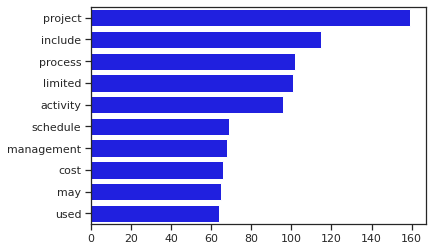

In [ ]:
#Plot common words
#Obtain top 10 words
top_10 = fdist.most_common(10)
#Create pandas series to make plotting easier
fd = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fd.index, x=fd.values, color='blue');

##<font color='Chocolate'> **14- Chunking** 🧩

In [ ]:
#"NP:{<DT>?<JJ>*<NN>}"
sentence = dfFinale['Pos_Tag']
grammar="Chunk:{<NN.?><VB.?><JJ>*<NN.?>}"
chunkParser = nltk.RegexpParser(grammar)
print(chunkParser)
for s in dfFinale['Pos_Tag']:
  chunked = chunkParser.parse(s)
  print(chunked)

chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?><VB.?><JJ>*<NN.?>'>
(S
  project/NN
  charter/NN
  document/NN
  purpose/RB
  high/JJ
  level/NN
  description/NN
  assumption/NN
  constraint/NN
  (Chunk requirement/NN intended/VBD satisfy/NN))
(S
  project/NN
  management/NN
  (Chunk plan/NN component/VBP include/NN)
  limited/JJ
  uuquality/JJ
  way/NN
  product/NN
  (Chunk scope/NN managed/VBD uenced/JJ organization/NN)
  quality/NN
  policy/NN
  methodology/NN
  (Chunk standard/NN implemented/VBN uuproject/JJ life/NN)
  cycle/NN
  (Chunk description/NN determines/VBZ series/NN)
  phase/NN
  pass/NN
  inception/NN
  end/NN
  uudevelopment/JJ
  approach/NN
  development/NN
  de/IN
  ne/FW
  whether/IN
  waterfall/NN
  iterative/JJ
  adaptive/JJ
  agile/NN
  hybrid/NN
  used/VBD)
(S
  enterprise/NN
  environmental/JJ
  factor/NN
  uence/NN
  (Chunk plan/NN scope/VBP management/NN)
  (Chunk
    process/NN
    include/VBP
    limited/JJ
    uuo

In [ ]:
dfFinale

,Chapter,Chapter Desc,Process,Process Desc,Title,Type,Corpus,Corpus_Tokens,Corpus_Lemma,Pos_Tag
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,input,project charter documents purpose high level d...,"[project, charter, documents, purpose, high, l...","[project, charter, document, purpose, high, le...","[(project, NN), (charter, NN), (document, NN),..."
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,project management plan components include lim...,"[project, management, plan, components, includ...","[project, management, plan, component, include...","[(project, NN), (management, NN), (plan, NN), ..."
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,enterprise environmental factors uence plan sc...,"[enterprise, environmental, factors, uence, pl...","[enterprise, environmental, factor, uence, pla...","[(enterprise, NN), (environmental, JJ), (facto..."
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,organizational process assets uence plan scope...,"[organizational, process, assets, uence, plan,...","[organizational, process, asset, uence, plan, ...","[(organizational, JJ), (process, NN), (asset, ..."
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,tool,expertise considered individuals groups specia...,"[expertise, considered, individuals, groups, s...","[expertise, considered, individual, group, spe...","[(expertise, NN), (considered, VBN), (individu..."
...,...,...,...,...,...,...,...,...,...,...
178,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.1.5 ORGANIZATIONAL PROCESS ASSETS\n,input,organizational process assets uence control co...,"[organizational, process, assets, uence, contr...","[organizational, process, asset, uence, contro...","[(organizational, JJ), (process, NN), (asset, ..."
179,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.1 EXPERT JUDGMENT\n,tool,examples expert judgment control costs process...,"[examples, expert, judgment, control, costs, p...","[example, expert, judgment, control, cost, pro...","[(example, NN), (expert, JJ), (judgment, NN), ..."
180,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.2 DATA ANALYSIS\n,tool,data analysis techniques used control costs in...,"[data, analysis, techniques, used, control, co...","[data, analysis, technique, used, control, cos...","[(data, NNS), (analysis, NN), (technique, NN),..."
181,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,complete performance index tcpi measure cost r...,"[complete, performance, index, tcpi, measure, ...","[complete, performance, index, tcpi, measure, ...","[(complete, JJ), (performance, NN), (index, NN..."


##<font color='Chocolate'> **15- TF-IDF** 🔢

In [ ]:
# Instantiate CountVectorizer() 
cv=CountVectorizer() 
# This steps generates word counts for the words in your docs 
dfFinale['Corpus_Lemma']=dfFinale['Corpus_Lemma'].astype(str)
word_count_vector=cv.fit_transform(dfFinale['Corpus_Lemma'])
print(word_count_vector)

  (0, 1264)	1
  (0, 249)	1
  (0, 494)	1
  (0, 1283)	1
  (0, 745)	1
  (0, 899)	1
  (0, 441)	1
  (0, 140)	1
  (0, 330)	1
  (0, 1379)	1
  (0, 842)	1
  (0, 1419)	1
  (1, 1264)	1
  (1, 441)	1
  (1, 947)	1
  (1, 1191)	1
  (1, 298)	1
  (1, 793)	1
  (1, 908)	1
  (1, 1766)	1
  (1, 1847)	1
  (1, 1257)	1
  (1, 1428)	1
  (1, 946)	1
  (1, 1637)	1
  :	:
  (181, 1252)	1
  (181, 1333)	1
  (181, 1007)	1
  (181, 736)	1
  (181, 508)	1
  (182, 1264)	1
  (182, 947)	1
  (182, 1669)	1
  (182, 824)	1
  (182, 1107)	1
  (182, 1297)	1
  (182, 1567)	1
  (182, 1008)	1
  (182, 1209)	1
  (182, 1628)	1
  (182, 665)	1
  (182, 719)	1
  (182, 1601)	1
  (182, 484)	1
  (182, 590)	1
  (182, 992)	1
  (182, 471)	1
  (182, 1285)	1
  (182, 580)	1
  (182, 5)	1


In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
# Print IDF values 
dfIDF = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["IDF_Weights"]) 
# Sort ascending 
dfIDF.sort_values(by=['IDF_Weights'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,IDF_Weights
project,1.259109
include,1.461346
limited,1.589963
process,1.650588
activity,1.966441
...,...
entail,5.521789
practitioner,5.521789
enough,5.521789
operation,5.521789


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfFinale['Corpus_Lemma'])
print(vectorizer.get_feature_names())

['abbreviation', 'abc', 'ability', 'able', 'abstract', 'ac', 'accelerate', 'accelerated', 'acceleration', 'acceptable', 'acceptance', 'accepted', 'accepts', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accordance', 'according', 'account', 'accounting', 'accumulate', 'accuracy', 'accurate', 'accurately', 'achievable', 'achieve', 'achieved', 'achieves', 'achieving', 'acknowledging', 'acquire', 'acquiring', 'across', 'action', 'active', 'activity', 'actor', 'actual', 'actually', 'adapt', 'adaptive', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'adjusts', 'administration', 'advance', 'advanced', 'advertising', 'af', 'affect', 'affected', 'agency', 'aggregate', 'aggregated', 'aggregating', 'agile', 'agreed', 'agreement', 'agrees', 'ahead', 'ai', 'aid', 'air', 'aircraft', 'airframe', 'al', 'algorithm', 'alignment', 'allocated', 'allow', 'allowance', 'allowing', 'allows', 'along', 'also', 'alter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##<font color='Chocolate'> **16- Similarty Distance** ==

In [ ]:
def LevenshteinDistance():
  edDictio={}
  for word in dfFinale['Corpus_Lemma']:
    a=np.random.choice(dfFinale['Corpus_Lemma'])
    b=np.random.choice(dfFinale['Corpus_Lemma'])
    ed_sent=nltk.edit_distance(a,b)
    edDictio[a,b]=ed_sent
  print(edDictio)

In [ ]:
LevenshteinDistance()

{("['project', 'management', 'plan', 'component', 'include', 'limited', 'uuschedule', 'schedule', 'establishes', 'criterion', 'activity', 'developing', 'monitoring', 'controlling', 'provides', 'process', 'control', 'impact', 'cost', 'estimation', 'uurisk', 'risk', 'approach', 'identifying', 'analyzing', 'risk']", "['project', 'document', 'considered', 'input', 'process', 'include', 'limited', 'uuactivity', 'attribute', 'activity', 'may', 'describe', 'necessary', 'sequence', 'event', 'de', 'ned', 'predecessor', 'successor', 'relationship', 'well', 'lead', 'lag', 'logical', 'activity', 'list', 'contains', 'schedule', 'required', 'sequenced', 'dependency', 'constraint', 'uence', 'sequencing', 'uuassumption', 'log', 'assumption', 'recorded', 'assumption', 'way', 'relationship', 'need', 'lead', 'lag', 'give', 'rise', 'individual', 'risk', 'impact', 'uumilestone', 'milestone', 'scheduled', 'date', 'speci', 'c', 'milestone', 'part', 'guide']"): 427, ("['schedule', 'data', 'project', 'model', 

##<font color='Chocolate'> **17- Word Cloud** ☁️

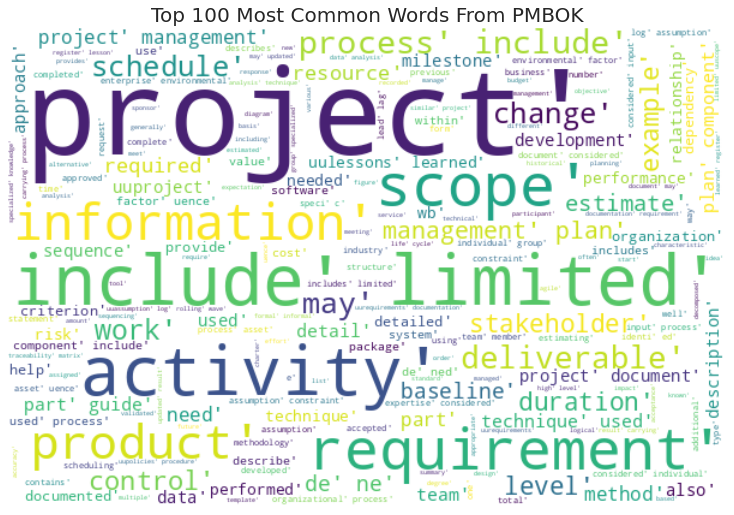

In [ ]:
all_words = ' '.join([word for word in dfFinale.Corpus_Lemma[:100]])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color='white').generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 100 Most Common Words From PMBOK",fontsize=20)
plt.tight_layout(pad=0)

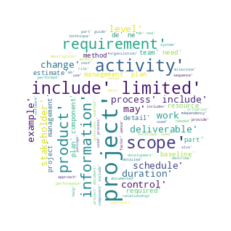

In [ ]:
# Different style of word cloud to use
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");